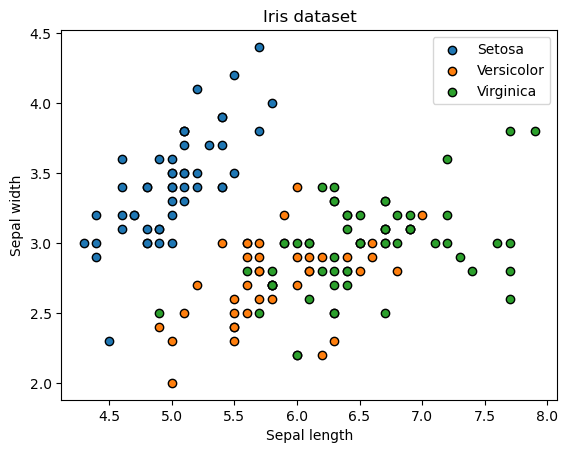


The provided target for the test dataset [1 1 0 0 0 0 0 0 1 1 1 2 2 2 2 0 2 1 1 2 1 1 1 0 0 0 1 2 0 2 2 0 2 2 1 1 0
 1 1 0 0 1 1 0 0]
The predicted target for the test dataset [1 1 0 0 0 0 0 0 1 1 1 2 2 2 2 0 2 1 1 2 1 1 1 0 0 0 2 2 0 2 2 0 2 1 1 1 0
 1 1 0 0 1 1 0 0]
Confusion matrix
            Setosa  Versicolor  Virginica
Setosa          17           0          0
Versicolor       0          16          1
Virginica        0           1         10

Here the rows denote the actual labels and columns denote the predicted labels
The accuracy of the prediction by the model is  0.9555555555555556

Precision,Recall,F1_score tally
                     precision  recall  f1_score
Setosa (label0)           1.00    1.00      1.00
Versicolor (label1)       0.94    0.94      0.94
Virginica (label2)        0.91    0.91      0.91

Average precision= 0.95
Average recall=0.95
Average f1_score=0.95


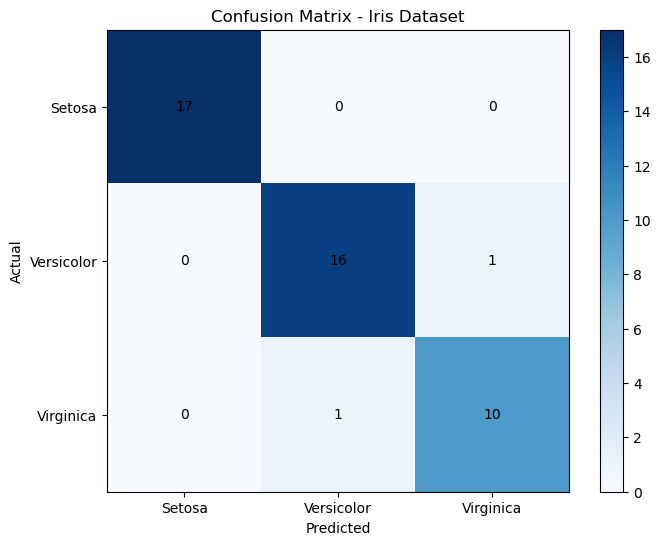

Checking my answer
Confusion matrix using sklearn
[[17  0  0]
 [ 0 16  1]
 [ 0  1 10]]
The result obtained using sklearn
Accuracy:  0.9555555555555556

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        17
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [76]:
#Question 1(i)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#These modules are imported to check my answers and not for finding answer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Loading the iris dataset
iris = datasets.load_iris()
x = iris.data[:, :2]  # Taking only the sepal length and width for visualization
y = iris.target
# print(x)
# print(y)
#Visualizing the data
plt.scatter(x[y == 0, 0], x[y == 0, 1], label='Setosa', cmap='Reds',edgecolor='black')
plt.scatter(x[y == 1, 0], x[y == 1, 1], label='Versicolor', cmap='Blues',edgecolor='black')
plt.scatter(x[y == 2, 0], x[y == 2, 1], label='Virginica', cmap='Greens',edgecolor='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.legend()
plt.show()
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=705)
# print(x_train)
# print(y_train)
#Initializing and training the SVM model 
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Testing the model
y_pred = svm_model.predict(x_test)
print()
print("The provided target for the test dataset",y_test)
print("The predicted target for the test dataset",y_pred)


def confusion_mat(y_test,y_pred,num_classes):
    conf_matrix = [[0 for i in range(num_classes)] for j in range(num_classes)]
    for i in range(len(y_test)):
        actual_class = y_test[i]
        pred_class = y_pred[i]
        conf_matrix[actual_class][pred_class]+=1 #The row refer to the actual class and column refer to the predicted class in the confusion matrix
    return conf_matrix
def class_report(conf_matrix,num_classes):
    conf_matrix = conf_matrix
    precision_ls = []
    recall_ls = []
    f1_score_ls = []
    dict1 = {}
    dict_class = {0:'Setosa',1:'Versicolor',2:'Virginica'}
    for i in range(num_classes):
        TP = conf_matrix[i][i] 
        row_sum = sum([conf_matrix[i][j] for j in range(num_classes)])#TP+FN since rows are actual data and columns are predicted data
        column_sum = sum([conf_matrix[j][i] for j in range(num_classes)])#TP+FP
        precision = TP/column_sum
        recall = TP/row_sum
        f1_score = 2*(precision*recall)/(precision+recall)
        precision_ls.append(precision)
        recall_ls.append(recall)
        f1_score_ls.append(f1_score)
        dict1.update({f"{dict_class[i]} (label{i})":{"precision":round(precision,2),'recall':round(recall,2),'f1_score':round(f1_score,2)}})
    df_class = pd.DataFrame(dict1)
    print()
    print("Precision,Recall,F1_score tally")
    print(df_class.T)
    return precision_ls,recall_ls,f1_score_ls    
        
num_classes = 3
conf_matrix = np.array(confusion_mat(y_test,y_pred,num_classes))
print("Confusion matrix")
df1 = pd.DataFrame(conf_matrix , columns = ['Setosa', 'Versicolor', 'Virginica'],index= ['Setosa', 'Versicolor', 'Virginica'] )
print(df1)
print()
print("Here the rows denote the actual labels and columns denote the predicted labels")
a = [conf_matrix[i][i] for i in range(num_classes)]
sum_accurate = sum(a)
accuracy = sum_accurate/len(y_test)
print("The accuracy of the prediction by the model is ",accuracy)
p,r,f=class_report(conf_matrix,num_classes)
print()
print(f"Average precision= {sum(p)/num_classes:.2f}")
print(f"Average recall={sum(r)/num_classes:.2f}")
print(f"Average f1_score={sum(f)/num_classes:.2f}")
#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(conf_matrix, cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')
ax.set_xticks([0, 1, 2], ['Setosa', 'Versicolor', 'Virginica'])
ax.set_yticks([0, 1, 2], ['Setosa', 'Versicolor', 'Virginica'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Iris Dataset')


plt.show()

# Used for checking my result using sklearn

print("Checking my answer")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix using sklearn")
print(conf_matrix)
print("The result obtained using sklearn")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
a= classification_report(y_test, y_pred, digits=2)
print()
print(a)




#The results obtained using sklearn and using my own functions are same

Visualising the digits


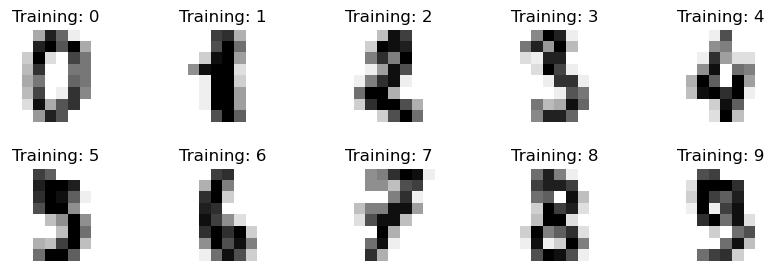

Dataset
      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0

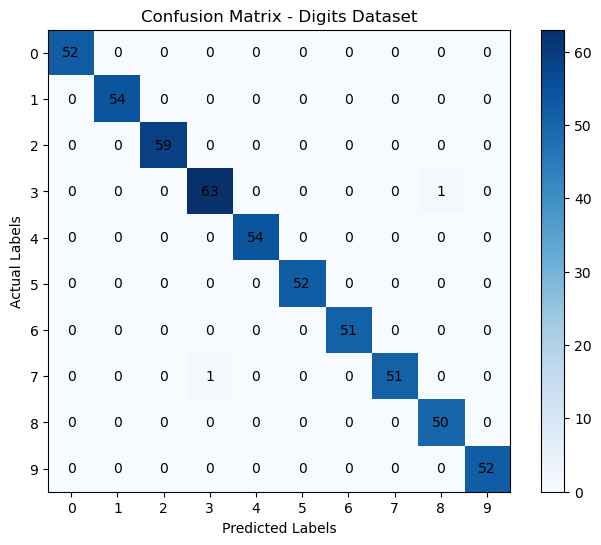


The results obtained using sklearn for checking my answers
The confusion matrix obtained from sklearn for checking my results
The connfusion matrix obtained without using sklearn method is 
    0   1   2   3   4   5   6   7   8   9
0  52   0   0   0   0   0   0   0   0   0
1   0  54   0   0   0   0   0   0   0   0
2   0   0  59   0   0   0   0   0   0   0
3   0   0   0  63   0   0   0   0   1   0
4   0   0   0   0  54   0   0   0   0   0
5   0   0   0   0   0  52   0   0   0   0
6   0   0   0   0   0   0  51   0   0   0
7   0   0   0   1   0   0   0  51   0   0
8   0   0   0   0   0   0   0   0  50   0
9   0   0   0   0   0   0   0   0   0  52
Accuracy:  0.9962962962962963

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        59
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00  

In [77]:
#Question 1(ii)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#These modules are imported to check my answers and not for finding answer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Loading the dataset
digits = datasets.load_digits()
x = digits.data
y = digits.target

# print(len(digits.images))
# print(x)
# print(y)
#Visualizing the data
print("Visualising the digits")
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()
df_X=pd.DataFrame(columns=digits['feature_names'], data=digits['data'])
df_y=pd.DataFrame({'target':digits['target']})
df=pd.merge(df_X,df_y,left_index=True,right_index=True)
print("Dataset")
print(df)


# Splitting the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=687)
# print(x_train)


#Initializing and training the SVM model 
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)



# Testing the model
y_pred = svm_model.predict(x_test)
# print("The provided target for the test dataset",y_test)
# print("The predicted target for the test dataset",y_pred)

def confusion_mat(y_test,y_pred,num_classes):
    conf_matrix = [[0 for i in range(num_classes)] for j in range(num_classes)] #The row refer to the actual class and column refer to the predicted class
    for i in range(len(y_test)):
        actual_class = y_test[i]
        pred_class = y_pred[i]
        conf_matrix[actual_class][pred_class]+=1
    return conf_matrix
def class_report(conf_matrix,num_classes):
    conf_matrix = conf_matrix
    precision_ls = []
    recall_ls = []
    f1_score_ls = []
    dict1={}
    for i in range(num_classes):
        TP = conf_matrix[i][i] 
        row_sum = sum([conf_matrix[i][j] for j in range(num_classes)])#TP+FN since rows are actual data and columns are predicted data
        column_sum = sum([conf_matrix[j][i] for j in range(num_classes)])#TP+FP
        precision = TP/column_sum
        recall = TP/row_sum
        f1_score = 2*(precision*recall)/(precision+recall)
        precision_ls.append(precision)
        recall_ls.append(recall)
        f1_score_ls.append(f1_score)
        dict1.update({f"label{i}":{"precision":round(precision,2),'recall':round(recall,2),'f1_score':round(f1_score,2)}})
    df_class = pd.DataFrame(dict1)
    print()
    print("Precision,Recall,F1_score tally")
    print(df_class.T)
    return precision_ls,recall_ls,f1_score_ls
        
num_classes = 10
conf_matrix = np.array(confusion_mat(y_test,y_pred,num_classes))
print()
print("The connfusion matrix obtained without using sklearn method is ")
df1 = pd.DataFrame(conf_matrix , columns = [i for i in range(10)],index= [i for i in range(10)] )
print(df1)
print("Here the rows denote the actual labels and columns denote the predicted labels")
a = [conf_matrix[i][i] for i in range(num_classes)]
sum_accurate = sum(a)
accuracy = sum_accurate/len(y_test)
print("Calculations without using sklearn methods : ")
print()
print("The accuracy of the prediction by the model is ",accuracy)
p,r,f = class_report(conf_matrix,num_classes)
print(f"Average precision= {sum(p)/num_classes:.2f}")
print(f"Average recall={sum(r)/num_classes:.2f}")
print(f"Average f1_score={sum(f)/num_classes:.2f}")
#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(conf_matrix, cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix - Digits Dataset')
plt.show()

# Used for testing my result
print()
print("The results obtained using sklearn for checking my answers")
conf_matrix = confusion_matrix(y_test, y_pred)
print("The confusion matrix obtained from sklearn for checking my results")
print("The connfusion matrix obtained without using sklearn method is ")
df1 = pd.DataFrame(np.array(conf_matrix) , columns = [i for i in range(10)],index= [i for i in range(10)] )
print(df1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
a= classification_report(y_test, y_pred, digits=2)
print()
print(a)

print('Training score of the model is:',svm_model.score(x_train,y_train))
print('Testing score of the model is:',svm_model.score(x_test,y_test))

#The results obtained using sklearn and using my own functions are same

Dataset: 
[[ 0.36303258  0.04148954  0.43072167]
 [ 0.85654396  0.41024628  0.4019308 ]
 [-0.07444528 -0.81721541  0.82193246]
 ...
 [ 0.04803977  0.52630896 -0.39214849]
 [ 0.31325963  0.71168211 -0.68083661]
 [ 0.59677258  0.62430041 -0.06103208]]

The eigen values are: 
[1.09076684 0.41317547 0.00246427]

The principal components are:(Column wise eigen vectors)
[[-0.33847725 -0.7109608  -0.61641536]
 [-0.77400604 -0.1621726   0.61205775]
 [ 0.53511475 -0.68427684  0.49539622]]
Individual eigen vectors
eigen vector1:  [-0.33847725 -0.77400604  0.53511475]
eigen vector2:  [-0.7109608  -0.1621726  -0.68427684]
eigen vector3:  [-0.61641536  0.61205775  0.49539622]

Projection of dataset on the principal components: 
[[ 0.07516141 -0.55977298  0.01521734]
 [-0.39270733 -0.95074153 -0.07755313]
 [ 1.0972232  -0.37718145 -0.04688727]
 ...
 [-0.6338038   0.14862112  0.09847446]
 [-1.02153591  0.12754035 -0.09456706]
 [-0.71819808 -0.48397321 -0.01576263]]

Using the PCA module in sklearn 



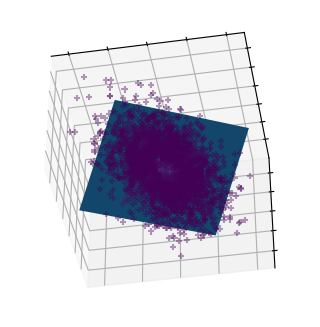

Simialarity=  1.0 which means the projection result obtained by me and the available link are 100% same


In [84]:
#Question 2
import numpy as np

from scipy import stats
from sklearn.decomposition import PCA

#Creating the data
e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm
X = np.c_[a, b, c]
print("Dataset: ")
print(X)


#PCA analysis without using PCA method
X_centered = X - X.mean(axis=0)
m = len(X_centered)
cov_matrix = np.dot(X_centered.T,X_centered)/(m) # we can also use np.cov()
eigenvalues, U = np.linalg.eig(cov_matrix) #using eigen decomposition
print()
print("The eigen values are: ")
print(eigenvalues)
print()
print("The principal components are:(Column wise eigen vectors)")
print(U)
eig1,eig2,eig3 = U.T
print("Individual eigen vectors")
print("eigen vector1: ",eig1.T)
print("eigen vector2: ",eig2.T)
print("eigen vector3: ",eig3.T)
n_components = 3
components = U[:, :n_components]
X_pca= np.dot(X_centered,components)
print()
print("Projection of dataset on the principal components: ")
print(X_pca)

#Code given in the link

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    #Using PCA module in sklearn
    print()
    print("Using the PCA module in sklearn ")
    pca = PCA(n_components=3)
    pca.fit(X)
    V = pca.components_.T
    print()
    print("The principal components are:(Column wise eigen vectors) ")
    print(V)
    X_pca2= pca.fit_transform(X)
    print()
    print("Projection of dataset on the principal components: ")
    print(X_pca2)

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    return X_pca2


elev = -40
azim = -80
X_pca2=plot_figs(1, elev, azim)

#Another view of the plane
# elev = 30
# azim = 20
# plot_figs(2, elev, azim)

plt.show()

#Checking both results
similarity=1-sum(sum(X_pca- X_pca2))/90000
print("Simialarity= ",similarity,"which means the projection result obtained by me and the available link are 100% same")


